
- Nama: Muhammad Rafidya
- Email: rafidya20@gmail.com
- Tempat tanggal lahir: Jakarta 13 Juli 2000
- Alamat: Arinda 2 Jln. Akasia 1 blok B2 no12, Tangerang Selatan
- Pekerjaan: Mahasiswa


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
        https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-31 10:39:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.06MB/s    in 55s     

2021-05-31 10:40:41 (5.63 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir) #menamai direktori dasar

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [68]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val') 

In [72]:
train_rock_dir = os.path.join(train_dir, 'rock')

train_scissor_dir = os.path.join(train_dir, 'scissors')

train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')

validation_scissor_dir = os.path.join(validation_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4) #untuk 40%

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(100, 150), 
        shuffle=True,
        subset='training',
        class_mode='categorical')
        

validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(100, 150), 
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 33s - loss: 0.3145 - accuracy: 0.8863 - val_loss: 0.2917 - val_accuracy: 0.8938
Epoch 2/20
25/25 - 33s - loss: 0.3628 - accuracy: 0.8558 - val_loss: 0.2155 - val_accuracy: 0.9312
Epoch 3/20
25/25 - 33s - loss: 0.2974 - accuracy: 0.8948 - val_loss: 0.1832 - val_accuracy: 0.9438
Epoch 4/20
25/25 - 33s - loss: 0.2008 - accuracy: 0.9262 - val_loss: 0.3498 - val_accuracy: 0.8813
Epoch 5/20
25/25 - 32s - loss: 0.2227 - accuracy: 0.9234 - val_loss: 0.2551 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 32s - loss: 0.2159 - accuracy: 0.9195 - val_loss: 0.1325 - val_accuracy: 0.9750
Epoch 7/20
25/25 - 32s - loss: 0.1798 - accuracy: 0.9299 - val_loss: 0.0849 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 32s - loss: 0.1260 - accuracy: 0.9545 - val_loss: 0.2080 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 34s - loss: 0.1331 - accuracy: 0.9538 - val_loss: 0.0934 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 33s - loss: 0.1570 - accuracy: 0.9425 - val_loss: 0.4587 - val_accuracy: 0.8625
Epoch 11/

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
rock


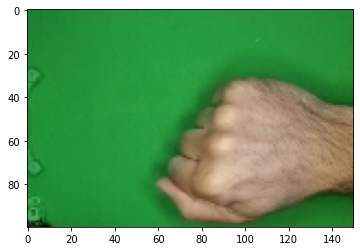

In [75]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)

print(fn)
if output_class ==0:
    print('paper')
elif output_class==1:
    print('rock')
else:
    print('scissors')